In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('checkout_1.csv')
df2 = pd.read_csv('checkout_2.csv')

df = pd.concat([df1, df2])

In [26]:
query = """
SELECT time, today, yesterday, avg_last_week, avg_last_month,
       ABS(today - avg_last_week) AS diff_today_avg_week,
       ABS(today - avg_last_month) AS diff_today_avg_month,
       ABS(today - yesterday) AS diff_today_yesterday
FROM df
ORDER BY time
"""
# to perform the same SQL query, in pandas is like:
query_result = df1[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']]
query_result2 = df2[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']]

query_result['diff_today_avg_week'] = query_result['today'] - query_result['avg_last_week']
query_result['diff_today_avg_week'] = query_result['diff_today_avg_week'].abs()

query_result['diff_today_avg_month'] = query_result['today'] - query_result['avg_last_month']
query_result['diff_today_avg_month'] = query_result['diff_today_avg_month'].abs()

query_result['diff_today_yesterday'] = query_result['today'] - query_result['yesterday']
query_result['diff_today_yesterday'] = query_result['diff_today_yesterday'].abs()

query_result2['diff_today_avg_week'] = query_result2['today'] - query_result2['avg_last_week']
query_result2['diff_today_avg_week'] = query_result2['diff_today_avg_week'].abs()

query_result2['diff_today_avg_month'] = query_result2['today'] - query_result2['avg_last_month']
query_result2['diff_today_avg_month'] = query_result2['diff_today_avg_month'].abs()

query_result2['diff_today_yesterday'] = query_result2['today'] - query_result2['yesterday']
query_result2['diff_today_yesterday'] = query_result2['diff_today_yesterday'].abs()

In [27]:
query_result.describe()

,today,yesterday,avg_last_week,avg_last_month,diff_today_avg_week,diff_today_avg_month,diff_today_yesterday
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.916667,21.791667,15.482917,14.630833,9.169583,9.968333,5.041667
std,19.410702,17.222279,11.106122,10.366863,8.414283,8.570067,5.195978
min,0.000000,0.000000,0.280000,0.210000,0.280000,0.180000,0.000000
25%,1.750000,2.500000,4.890000,4.207500,1.745000,2.007500,1.000000
50%,26.500000,26.500000,18.065000,17.925000,8.145000,8.960000,3.500000
75%,36.000000,35.250000,25.922500,24.460000,12.757500,14.587500,7.000000
max,55.000000,51.000000,33.710000,28.500000,25.580000,26.650000,17.000000


In [28]:
query_result2.describe()

,today,yesterday,avg_last_week,avg_last_month,diff_today_avg_week,diff_today_avg_month,diff_today_yesterday
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17.791667,21.916667,11.936958,14.525417,11.411958,10.599583,12.125000
std,16.699334,19.410702,9.098644,10.384685,9.146296,8.761567,15.509639
min,0.000000,0.000000,0.140000,0.210000,0.140000,0.210000,0.000000
25%,2.750000,1.750000,2.750000,4.215000,1.507500,2.010000,1.750000
50%,15.000000,26.500000,12.425000,17.730000,12.005000,9.215000,5.500000
75%,29.750000,36.000000,19.747500,24.350000,19.572500,16.380000,14.500000
max,46.000000,55.000000,26.140000,28.570000,25.860000,27.780000,51.000000


In [30]:
total_sales_today1 = np.sum(query_result['today'])
total_sales_today2 = np.sum(query_result2['today'])
print(total_sales_today1, total_sales_today2)

526 427


In [31]:
total_sales_avg_last_month1 = np.sum(query_result['avg_last_month'])
total_sales_avg_last_month2 = np.sum(query_result2['avg_last_month'])
print(total_sales_avg_last_month1, total_sales_avg_last_month2)

351.14000000000004 348.61


In [32]:
total_sales_yesterday1 = np.sum(query_result['yesterday'])
total_sales_yesterday2 = np.sum(query_result2['yesterday'])
print(total_sales_yesterday1, total_sales_yesterday2)

523 526


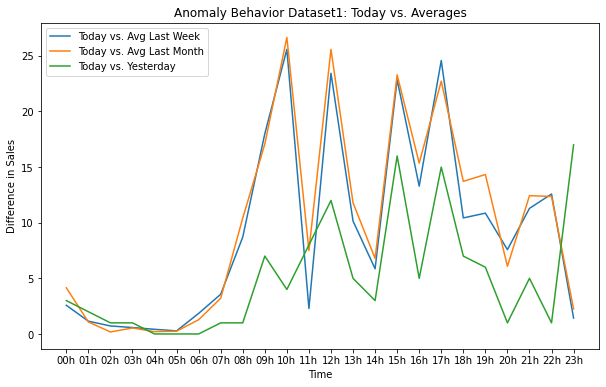

In [33]:
plt.figure(figsize = (10, 6))
plt.plot(query_result['time'], query_result['diff_today_avg_week'], label='Today vs. Avg Last Week')
plt.plot(query_result['time'], query_result['diff_today_avg_month'], label='Today vs. Avg Last Month')
plt.plot(query_result['time'], query_result['diff_today_yesterday'], label='Today vs. Yesterday')
plt.xlabel('Time')
plt.ylabel('Difference in Sales')
plt.title('Anomaly Behavior Dataset1: Today vs. Averages')
plt.legend()
plt.show()

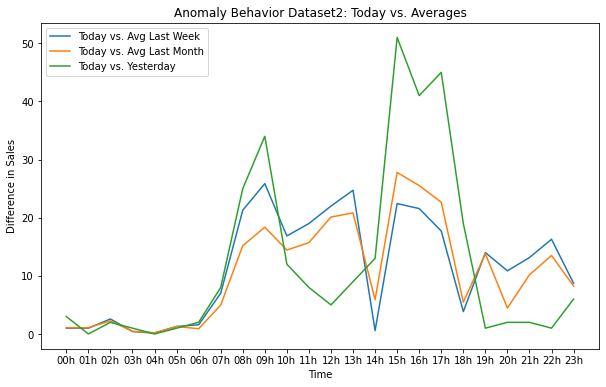

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(query_result2['time'], query_result2['diff_today_avg_week'], label='Today vs. Avg Last Week')
plt.plot(query_result2['time'], query_result2['diff_today_avg_month'], label='Today vs. Avg Last Month')
plt.plot(query_result2['time'], query_result2['diff_today_yesterday'], label='Today vs. Yesterday')
plt.xlabel('Time')
plt.ylabel('Difference in Sales')
plt.title('Anomaly Behavior Dataset2: Today vs. Averages')
plt.legend()
plt.show()

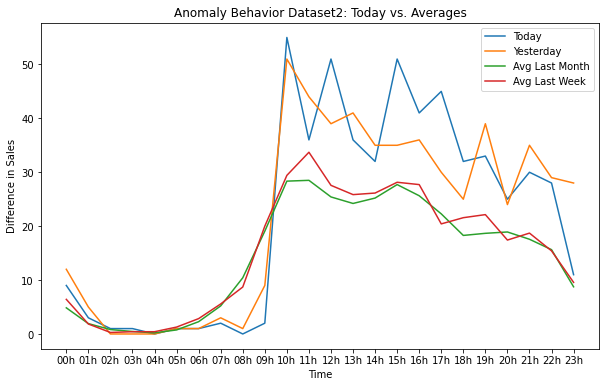

In [37]:
plt.figure(figsize = (10, 6))
plt.plot(query_result['time'], query_result['today'], label='Today')
plt.plot(query_result['time'], query_result['yesterday'], label='Yesterday')
plt.plot(query_result['time'], query_result['avg_last_month'], label='Avg Last Month')
plt.plot(query_result['time'], query_result['avg_last_week'], label='Avg Last Week')
plt.xlabel('Time')
plt.ylabel('Difference in Sales')
plt.title('Anomaly Behavior Dataset2: Today vs. Averages')
plt.legend()
plt.show()

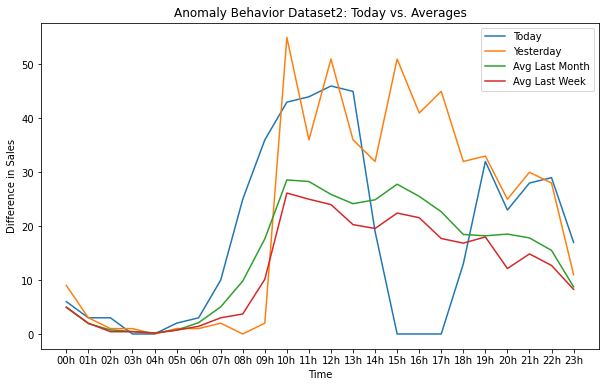

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(query_result2['time'], query_result2['today'], label='Today')
plt.plot(query_result2['time'], query_result2['yesterday'], label='Yesterday')
plt.plot(query_result2['time'], query_result2['avg_last_month'], label='Avg Last Month')
plt.plot(query_result2['time'], query_result2['avg_last_week'], label='Avg Last Week')
plt.xlabel('Time')
plt.ylabel('Difference in Sales')
plt.title('Anomaly Behavior Dataset2: Today vs. Averages')
plt.legend()
plt.show()

# Conclusions:

We can observe that in the 'Today' data from dataset2 ('checkout_2.csv'), there was a sharp drop in the number of sales starting at 13h, reaching zero by 15h. Sales only resumed from 17h, returning to normal levels by 18h.